### Статистика
Темы сегодняшнего семинара с практической точки зрения:
 - Понятие генеральной совокупности и выборки, репрезентативность выборки 
 - Простая случайная выборка
 - Стратифицированная выборка
 - Типы переменных
 - Количественные переменные
 - Номинативные переменные
 - Ранговые переменные
 - Понятие описательной статистики
 - Мода
 - Медиана
 - Среднее значение
 - Размах
 - Дисперсия, стандартное отклонение
 - Свойства дисперсии и стандартного отклонения
 - Выбор меры центральной тенденции
 - Свойства среднего
 - Квантили распределения
 - Квартили
 - Box plot
 - Понятие нормального распределения
 - Стандартизация
 - Правила двух и трех сигм, использование стандартизации
 - ЦПТ
 - Статистическая проверка гипотез
 - Идея статистического вывода, p-уровень значимости и его интерпретация
 - Сравнение двух средних
 - t-критерий Стьюдента
 - Построение графиков
 - Сравнение распределения с нормальным
 - Проблема выбросов
 - U-критерий Манна-Уитни

### Ну что. Начнем?

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
### Случайная выборка
tmp = data.sample(100)

In [6]:
data.MSZoning.value_counts() / data.shape[0]

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: count, dtype: float64

In [7]:
tmp.MSZoning.value_counts() / tmp.shape[0]

MSZoning
RL         0.81
RM         0.14
RH         0.02
FV         0.02
C (all)    0.01
Name: count, dtype: float64

In [8]:
### Стратификация

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
_, tmp = train_test_split(data, test_size=100/len(data), stratify=data['MSZoning'])

In [14]:
tmp.MSZoning.value_counts() / tmp.shape[0]

MSZoning
RL         0.79
RM         0.15
FV         0.04
C (all)    0.01
RH         0.01
Name: count, dtype: float64

In [15]:
tmp.shape

(100, 81)

### Типы переменных

#### Количественные
виды:
1. Количественные (непрерывные и дискретные)
2. Номинативные (категориальные)
3. Ранговые

In [16]:
### Категориальная
# MSZoning: Identifies the general zoning classification of the sale.
    #    A	Agriculture
    #    C	Commercial
    #    FV	Floating Village Residential
    #    I	Industrial
    #    RH	Residential High Density
    #    RL	Residential Low Density
    #    RP	Residential Low Density Park 
    #    RM	Residential Medium Density
data.MSZoning

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [17]:
### Непрерывная
data.LotArea

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [18]:
# OverallQual: Rates the overall material and finish of the house

#        10	Very Excellent
#        9	Excellent
#        8	Very Good
#        7	Good
#        6	Above Average
#        5	Average
#        4	Below Average
#        3	Fair
#        2	Poor
#        1	Very Poor

data.OverallQual

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [19]:
# Fireplaces: Number of fireplaces
data.Fireplaces.unique()

array([0, 1, 2, 3])

### Описательная статистика

<Axes: >

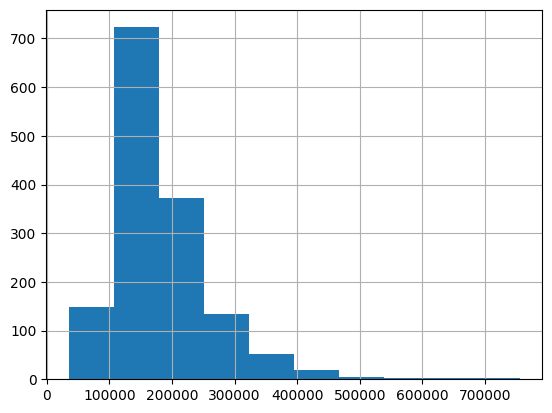

In [20]:
data.SalePrice.hist(bins=10)

In [21]:
### Гистограмма частот
import seaborn as sns

<Axes: xlabel='SalePrice', ylabel='Count'>

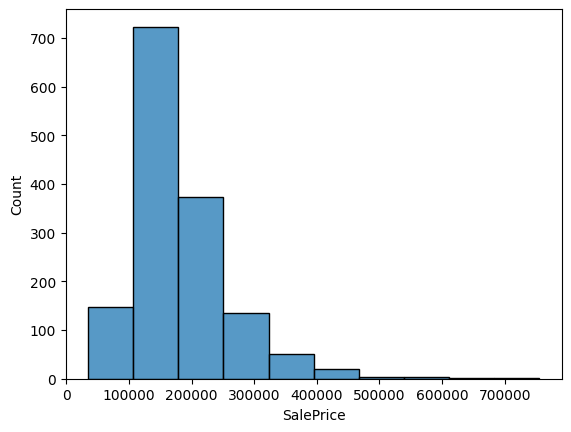

In [22]:
sns.histplot(data.SalePrice, bins=10)

<Axes: xlabel='OverallCond', ylabel='Count'>

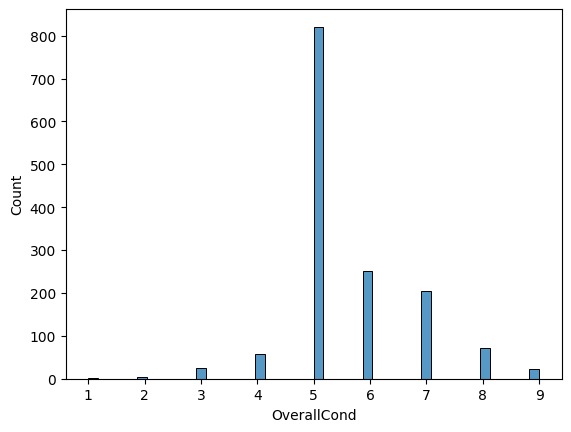

In [23]:
sns.histplot(data.OverallCond)

In [24]:
### Мода
data.SalePrice.value_counts().index[0]

np.int64(140000)

In [25]:
### Мода
data.SalePrice.mode()

0    140000
Name: SalePrice, dtype: int64

In [26]:
### Медианы
data.SalePrice.median()

np.float64(163000.0)

In [27]:
### Средние
data.SalePrice.mean()

np.float64(180921.19589041095)

In [29]:
### Размах
data.SalePrice.max() - data.SalePrice.min()

np.int64(720100)

In [30]:
### Дисперсия
data.SalePrice.var()

np.float64(6311111264.297448)

In [31]:
# Стандартное отклонение
data.SalePrice.std()

np.float64(79442.50288288662)

### Свойства

In [46]:
data.SalePrice.std(), (data.SalePrice + 100).std()

(np.float64(79442.50288288662), np.float64(79442.50288288662))

In [47]:
data.SalePrice.var(), (data.SalePrice + 100).var()

(np.float64(6311111264.297448), np.float64(6311111264.297448))

In [49]:
data.SalePrice.std(), (data.SalePrice * 10).std()

(np.float64(79442.50288288662), np.float64(794425.0288288661))

In [48]:
data.SalePrice.var(), (data.SalePrice * 10).var()

(np.float64(6311111264.297448), np.float64(631111126429.7446))

In [37]:
# Квантили
data.SalePrice.quantile(0.1), data.SalePrice.quantile(0.95)

(np.float64(106475.0), np.float64(326099.9999999999))

In [38]:
# Квартили
data.SalePrice.quantile(0.25), data.SalePrice.quantile(0.5), data.SalePrice.quantile(0.75)

(np.float64(129975.0), np.float64(163000.0), np.float64(214000.0))

### Box-plot

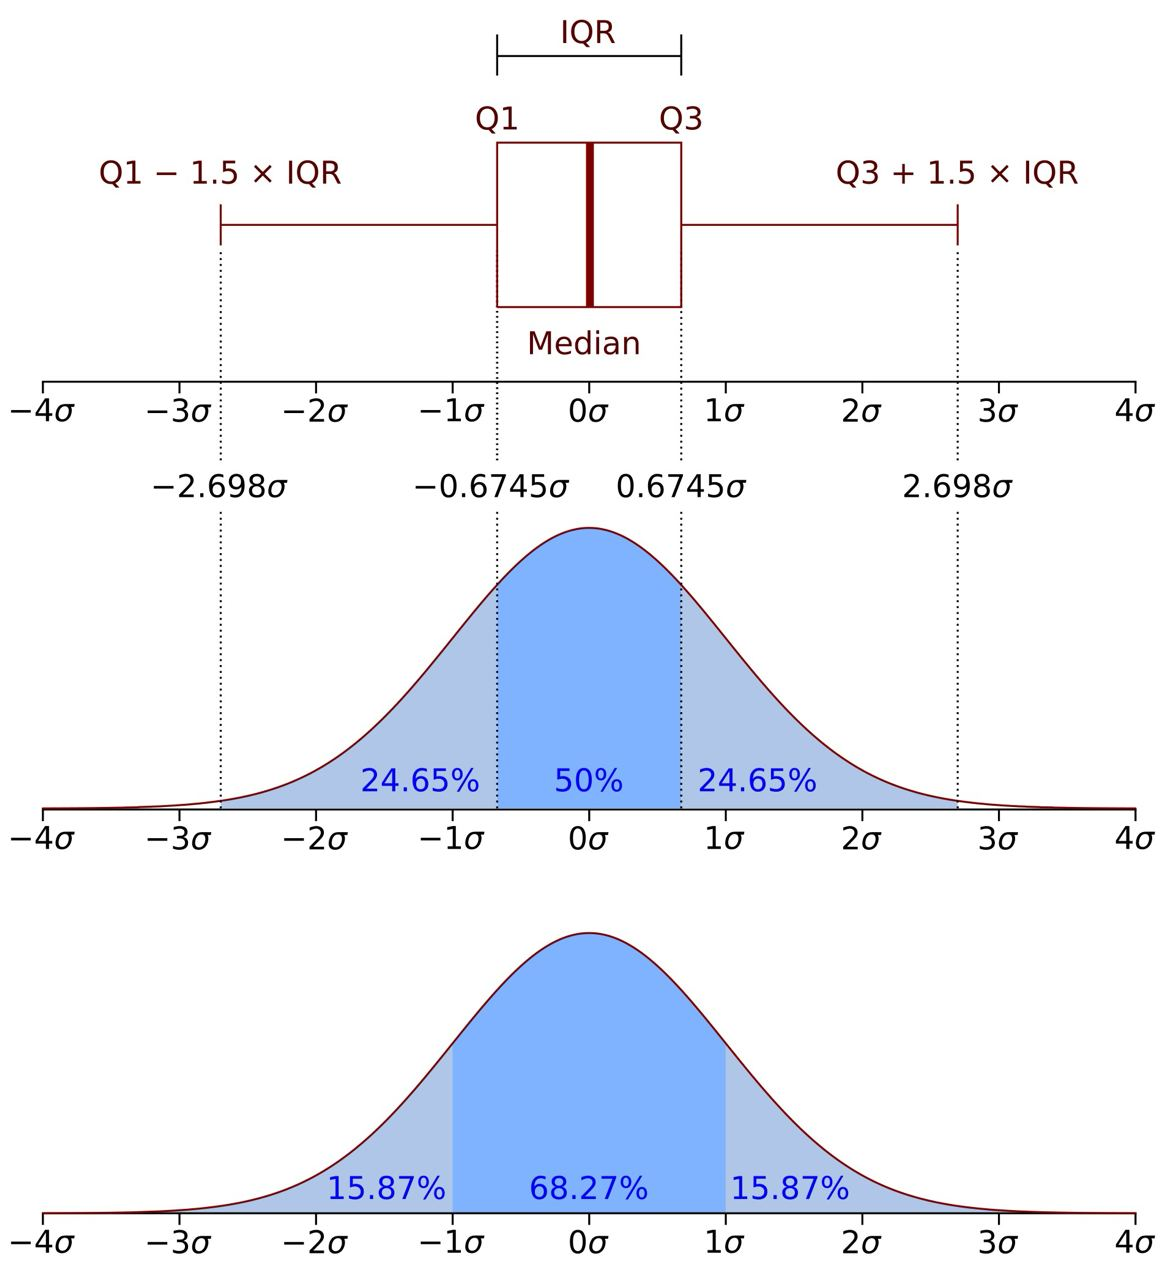

<Axes: ylabel='SalePrice'>

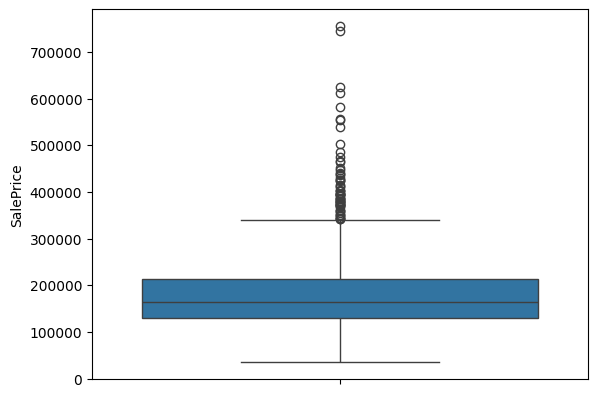

In [41]:
sns.boxplot(data.SalePrice)

<Axes: >

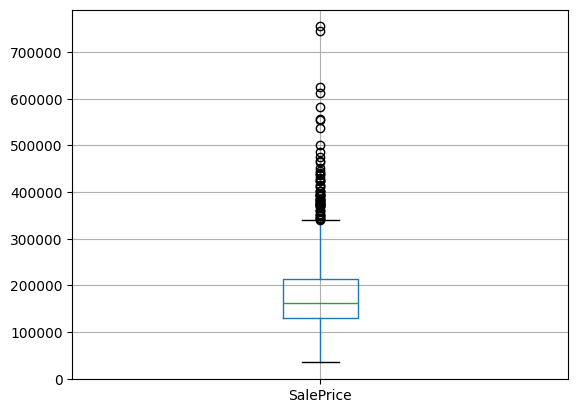

In [43]:
data.boxplot("SalePrice")

### Нормальное распределение

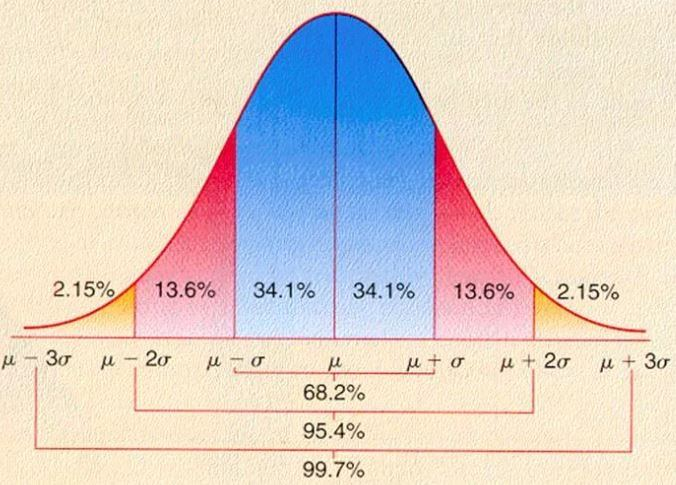

### Стандартизация

Стандартизация - приведение распределения к нормальному со средним 0 и дисперсией 1.

In [51]:
tmp = (data.SalePrice - data.SalePrice.mean()) / data.SalePrice.std()

In [52]:
tmp.mean(), tmp.std()

(np.float64(1.3140173880495004e-16), np.float64(0.9999999999999999))

<Axes: xlabel='SalePrice', ylabel='Count'>

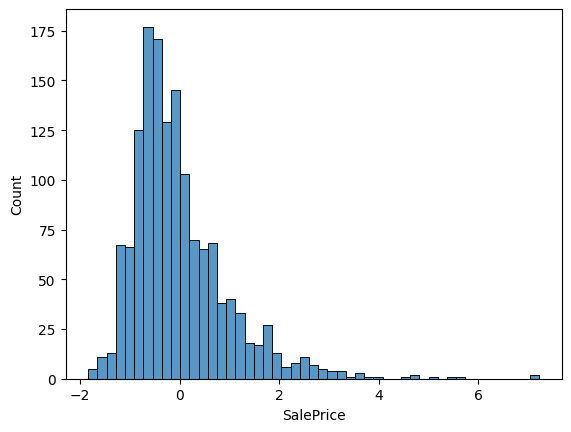

In [53]:
sns.histplot(tmp)

<Axes: ylabel='Count'>

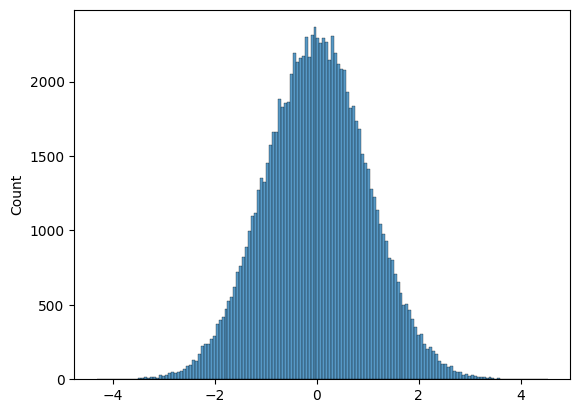

In [71]:
tmp = np.random.randn(100000)
sns.histplot(tmp)

In [72]:
min_value = tmp.mean() - 3 * tmp.std()
max_value = tmp.mean() + 3 * tmp.std()
np.where((tmp > min_value) & (tmp < max_value))[0].shape[0] / tmp.shape[0]

0.9972

In [73]:
min_value = tmp.mean() - 2 * tmp.std()
max_value = tmp.mean() + 2 * tmp.std()
np.where((tmp > min_value) & (tmp < max_value))[0].shape[0] / tmp.shape[0]

0.95428

In [74]:
min_value = tmp.mean() - tmp.std()
max_value = tmp.mean() + tmp.std()
np.where((tmp > min_value) & (tmp < max_value))[0].shape[0] / tmp.shape[0]

0.68349

### Центральная предельная теорема (ЦПТ)

In [135]:
tmp = np.array([data.SalePrice.sample(100).mean() for x in range(10000)])

<Axes: ylabel='Count'>

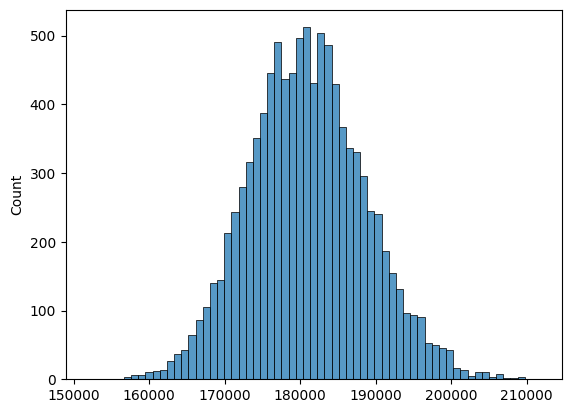

In [136]:
sns.histplot(tmp)

In [137]:
min_value = tmp.mean() - 3 * tmp.std()
max_value = tmp.mean() + 3 * tmp.std()
np.where((tmp > min_value) & (tmp < max_value))[0].shape[0] / tmp.shape[0]

0.9965

In [138]:
min_value = tmp.mean() - 2 * tmp.std()
max_value = tmp.mean() + 2 * tmp.std()
np.where((tmp > min_value) & (tmp < max_value))[0].shape[0] / tmp.shape[0]

0.9548

In [139]:
min_value = tmp.mean() - tmp.std()
max_value = tmp.mean() + tmp.std()
np.where((tmp > min_value) & (tmp < max_value))[0].shape[0] / tmp.shape[0]

0.6859

### Статистическая проверка гипотез

вероятность получить для данной вероятностной модели распределения значений случайной величины такое же или более экстремальное значение статистики (среднего арифметического, медианы и др.), по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна.
или простыми словами p - уровень значимости  - вероятнтость получить среднее значение отклоняющееся от среднего значения ГС

In [142]:
from scipy import stats

In [143]:
### Критерий Колмогорова-Смирнова. Чаще всего используется для оценки принадлежности выборки определенному распределению

In [230]:
### Не можем отклонить нулевую гипотезу
first_dist = np.random.randn(10000)
second_dist = np.random.randn(1000)
stats.kstest(second_dist, first_dist)

KstestResult(statistic=np.float64(0.0156), pvalue=np.float64(0.9778534142166371), statistic_location=np.float64(0.48778274887518824), statistic_sign=np.int8(-1))

In [232]:
first_dist = data.SalePrice
second_dist = data.SalePrice.sample(100)
stats.kstest(second_dist, first_dist)

KstestResult(statistic=np.float64(0.06095890410958904), pvalue=np.float64(0.8558443718825731), statistic_location=np.int64(156000), statistic_sign=np.int8(-1))

In [239]:
first_dist = data.SalePrice
second_dist = data.SalePrice.sample(100) + 200000
stats.kstest(second_dist, first_dist)

KstestResult(statistic=np.float64(0.8765753424657534), pvalue=np.float64(3.4877961531046417e-82), statistic_location=np.int64(275500), statistic_sign=np.int8(-1))

In [ ]:
### ttest

In [257]:
### Не можем отклонить нулевую гипотезу
first_dist = np.random.randn(10000)
second_dist = np.random.randn(1000)
stats.ttest_ind(second_dist, first_dist)

TtestResult(statistic=np.float64(0.15473893018781493), pvalue=np.float64(0.8770299772356498), df=np.float64(10998.0))

In [250]:
first_dist = data.SalePrice
second_dist = data.SalePrice.sample(100)
stats.ttest_ind(second_dist, first_dist)

TtestResult(statistic=np.float64(-0.1998986675632598), pvalue=np.float64(0.8415859196519746), df=np.float64(1558.0))

In [258]:
first_dist = data.SalePrice
second_dist = data.SalePrice.sample(100) + 200000
stats.ttest_ind(second_dist, first_dist)

TtestResult(statistic=np.float64(22.76300032913976), pvalue=np.float64(2.9578035605545175e-99), df=np.float64(1558.0))

### Критерий Манна-Уитни

In [270]:
first_dist = data.SalePrice
second_dist = data.SalePrice.sample(100)
stats.ttest_ind(second_dist, first_dist)

TtestResult(statistic=np.float64(0.2843562052513402), pvalue=np.float64(0.7761752049581406), df=np.float64(1558.0))

### Подробнее об AB - тестах